In [31]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [32]:
cleansed=cleansed_data()

ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool


In [33]:
cleansed.count().count()

140

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [34]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKEI 225 INDEX
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
Canadian Bankers Acceptance
Russian Ruble


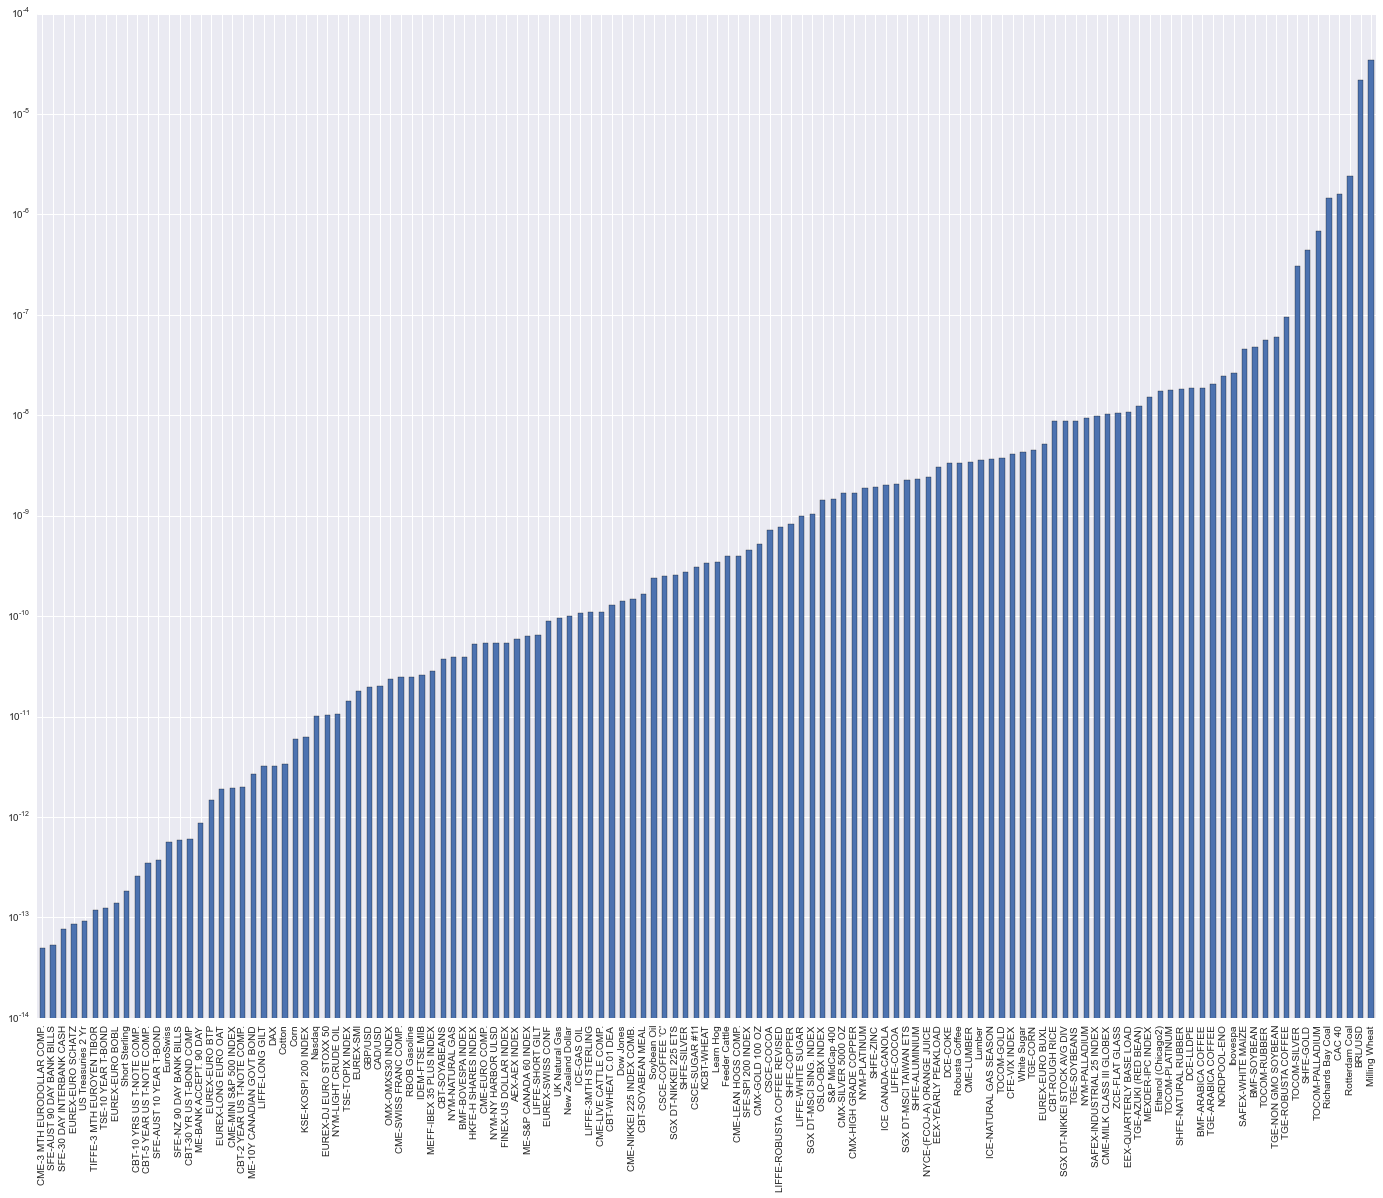

In [35]:
amihud.mean().dropna().sort_values().dropna().plot(kind='bar',logy=True)

In [10]:
amihud.resample(rule='a',how='mean').tail()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


,AEX-AEX INDEX,BMF-ARABICA COFFEE,BMF-BOVESPA INDEX,BMF-SOYBEAN,BMF-US DOLLAR,BRL/USD,CAC 40,CAD/USD,CBT-10 YRS US T-NOTE COMP.,CBT-2 YEAR US T-NOTE COMP.,...,TOCOM-PLATINUM,TOCOM-RUBBER,TOCOM-SILVER,TSE-10 YEAR T-BOND,TSE-TOPIX INDEX,UK Natural Gas,US Treasuries 2 Yr,White Sugar,ZCE-FLAT GLASS,ZCE-RAPESEED MEAL
2012-12-31,NaN,1.333047e-08,2.275585e-12,NaN,NaN,3.816998e-09,8.443024e-06,1.103179e-12,4.700459e-14,2.452913e-14,...,2.643470e-08,5.512046e-08,3.677056e-07,4.715282e-14,7.334709e-12,4.580737e-12,2.335104e-14,5.166423e-09,NaN,NaN
2013-12-31,NaN,1.042626e-08,3.999645e-12,NaN,NaN,2.778200e-09,3.607371e-08,1.687965e-12,7.244217e-14,3.470427e-14,...,1.571421e-08,5.218394e-08,6.255828e-07,7.166143e-14,6.446751e-12,2.221335e-12,3.491636e-14,2.559982e-10,1.984049e-08,NaN
2014-12-31,1.909149e-10,8.930543e-09,4.104145e-12,NaN,NaN,1.583417e-09,2.008876e-11,2.095324e-12,4.162175e-14,5.021105e-14,...,9.744482e-09,7.158376e-08,3.173948e-07,6.281722e-14,3.933785e-12,9.494235e-12,5.444223e-14,5.503985e-10,5.675110e-09,NaN
2015-12-31,2.349810e-11,8.977050e-09,6.020755e-12,NaN,NaN,3.099230e-09,2.648656e-11,4.442855e-12,4.982083e-14,4.901498e-14,...,2.214318e-08,8.626090e-08,3.251359e-07,5.214914e-14,4.029340e-12,3.887350e-12,5.190416e-14,1.314658e-09,1.011090e-08,NaN
2016-12-31,7.281143e-12,1.122005e-08,1.014065e-11,NaN,NaN,2.331501e-09,5.249782e-12,3.717769e-12,6.930795e-14,6.700921e-14,...,1.222056e-08,1.181200e-07,4.403143e-07,9.247255e-14,3.520470e-12,1.014352e-11,7.089413e-14,4.389988e-10,8.002116e-09,NaN


Idea:

* Sort portfolios on an annual baisis
* cacluated $\sigma$, $\mu$, skew, max drawdown

In [36]:
quantile_columns(amihud.resample(rule='a',how='median'),'2015-12-31',10,9)


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  if __name__ == '__main__':


['SGX DT-NIKKEI STOCK AVG DIV',
 'TGE-AZUKI (RED BEAN)',
 'SHFE-GOLD',
 'SAFEX-WHITE MAIZE',
 'TOCOM-PLATINUM',
 'TGE-SOYBEANS',
 'NORDPOOL-ENO',
 'Ibovespa',
 'TOCOM-RUBBER',
 'TOCOM-SILVER',
 'TOCOM-PALLADIUM',
 'Rotterdam Coal']

In [43]:
number_of_buckets=10
expected_rtn=[]
for y in range(2000,2016,1):
    year=str(y) + '-12-31'
    means=[]
    means.append(y)
    for i in range(0,number_of_buckets,1):
        mkts=quantile_columns(amihud.resample(rule='a',how='median'),year,number_of_buckets,i)
        means.append(cleansed.resample(rule='m',how='last')[mkts].pct_change()[str(y+1)].median().median()) 
    expected_rtn.append(means)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


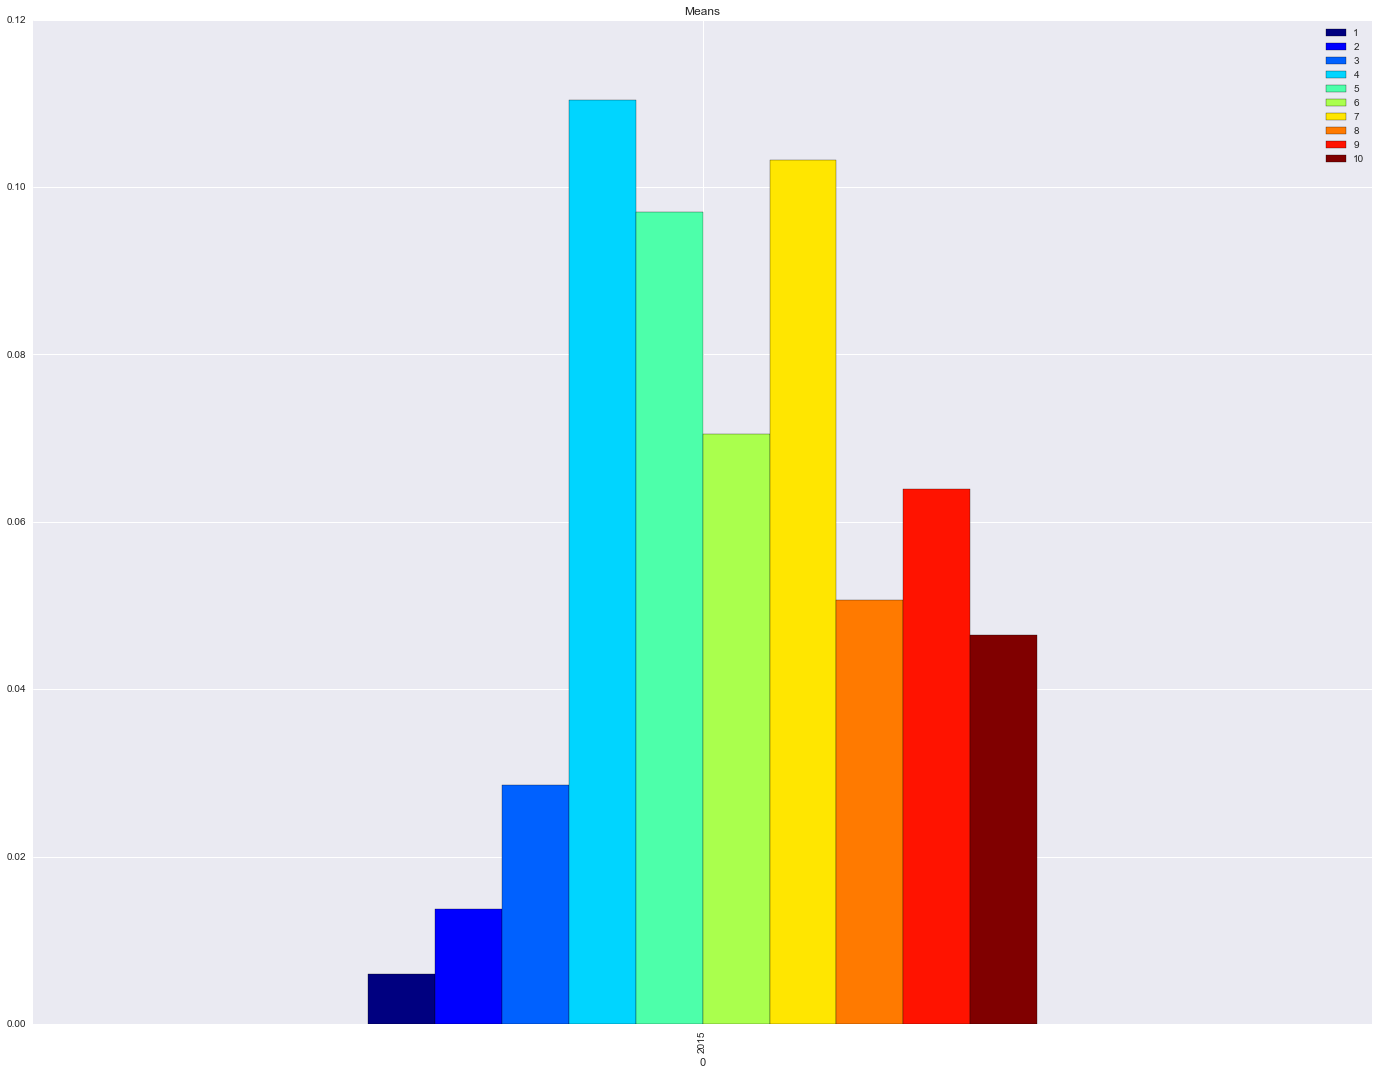

In [44]:
pd.DataFrame(expected_rtn).set_index(0).cumsum().tail(1).plot(colormap='jet',kind='bar',title='Means')

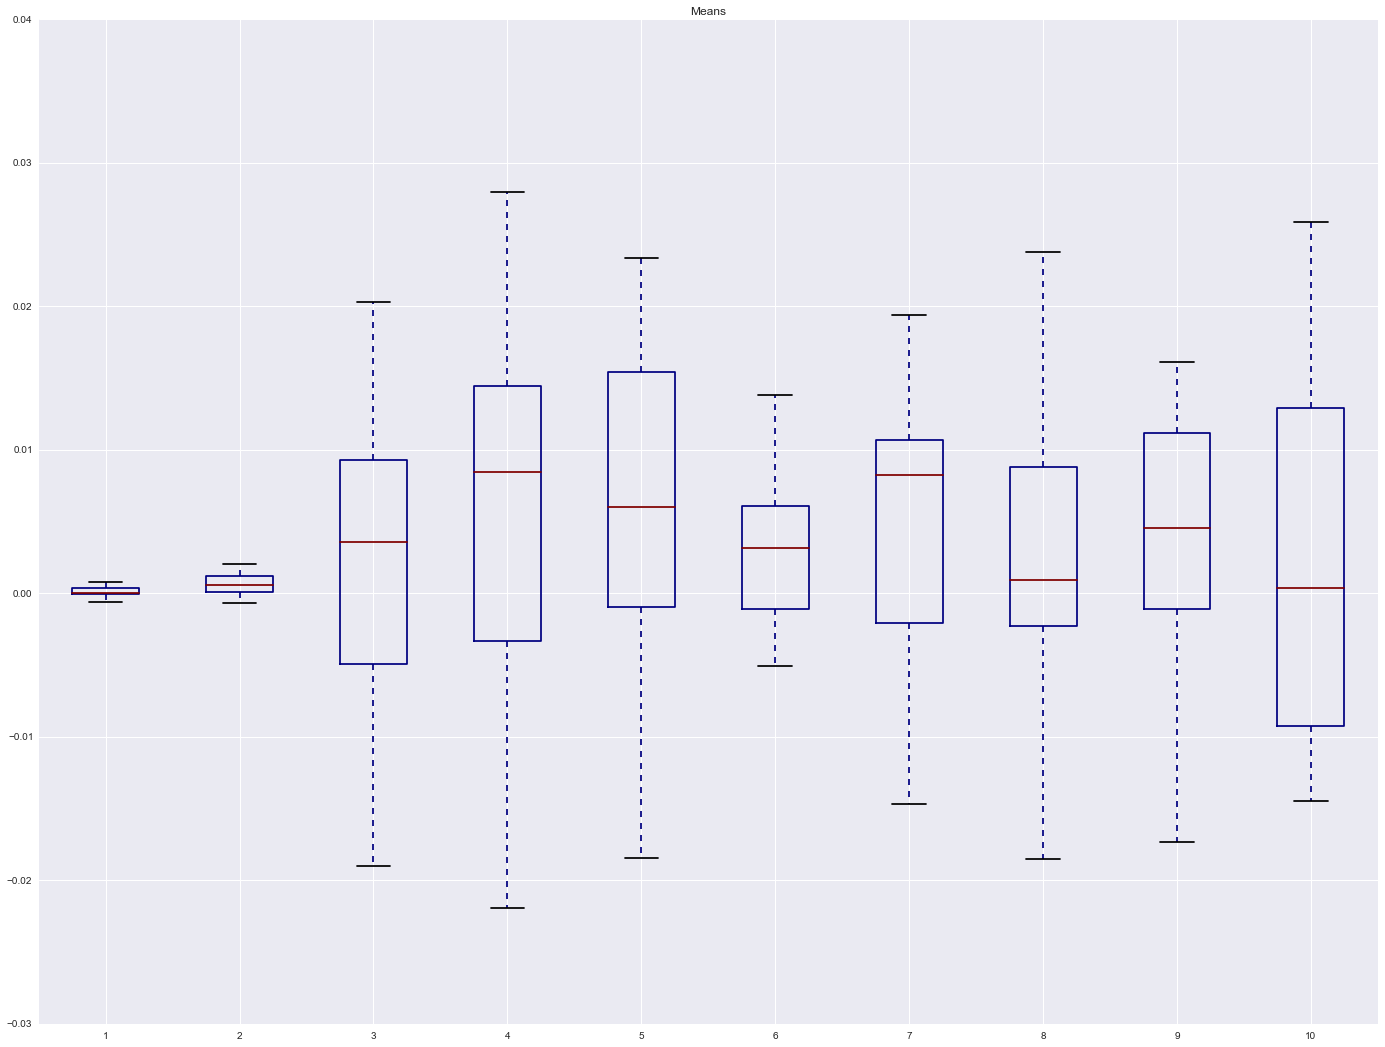

In [45]:
pd.DataFrame(expected_rtn).set_index(0).plot(colormap='jet',kind='box',title='Means')

* Need to creat panel data and start running regression on that.  